In [1]:
import sys
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

%matplotlib inline
%config InlineBackend.figure_format='retina'

#!pip3 install fbprophet
#!pip install fbprophet
#!pip install pystan==2.19.1.1 --quiet
#!pip install fbprophet --quiet
#!pip install fbprophet
!pip install yfinance --quiet
!pip3 install pystan 
!pip install prophet
from prophet import Prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 KB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 KB 5.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from pandas import read_csv
from datetime import datetime
	
df = pd.read_csv('/content/drive/MyDrive/dataAir_phrakanong.csv', usecols=[0,1,2,3,4,5,6,7,8,9,10,11],parse_dates=['date'], skipinitialspace=True)
df 

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,65.291667,1.33,74.2,45.4,119.5,NaN,27.1,70,1009.40,100.0,9.0
1,2018-01-02,77.041667,1.35,73.0,51.3,124.2,NaN,27.5,67,1009.40,120.0,4.0
2,2018-01-03,96.708333,1.73,98.5,58.0,156.5,NaN,28.2,66,1009.40,60.0,4.0
3,2018-01-04,115.125000,1.76,92.4,62.7,155.2,NaN,29.3,64,1009.40,330.0,6.0
4,2018-01-05,116.625000,1.35,51.1,60.9,111.9,NaN,30.4,63,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,84.000000,1.50,117.6,35.2,152.9,19.0,28.5,79,1009.24,120.0,9.0
1761,2022-10-28,92.000000,1.60,127.1,38.1,165.2,21.0,29.6,72,1009.24,170.0,7.0
1762,2022-10-29,90.000000,1.30,92.0,43.1,135.1,23.0,29.5,62,1009.24,120.0,13.0
1763,2022-10-30,95.000000,1.30,76.9,51.5,128.4,32.0,30.0,62,1009.24,120.0,13.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1765 entries, 0 to 1764
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              1765 non-null   datetime64[ns]
 1   pm10              1721 non-null   float64       
 2   co                1737 non-null   float64       
 3   no                1739 non-null   float64       
 4   no2               1739 non-null   float64       
 5   nox               1738 non-null   float64       
 6   pm25              1016 non-null   float64       
 7   avgT              1695 non-null   float64       
 8   humid             1765 non-null   int64         
 9   pressure-monthly  1765 non-null   float64       
 10  windDir           1735 non-null   float64       
 11  windSpd           1737 non-null   float64       
dtypes: datetime64[ns](1), float64(10), int64(1)
memory usage: 165.6 KB


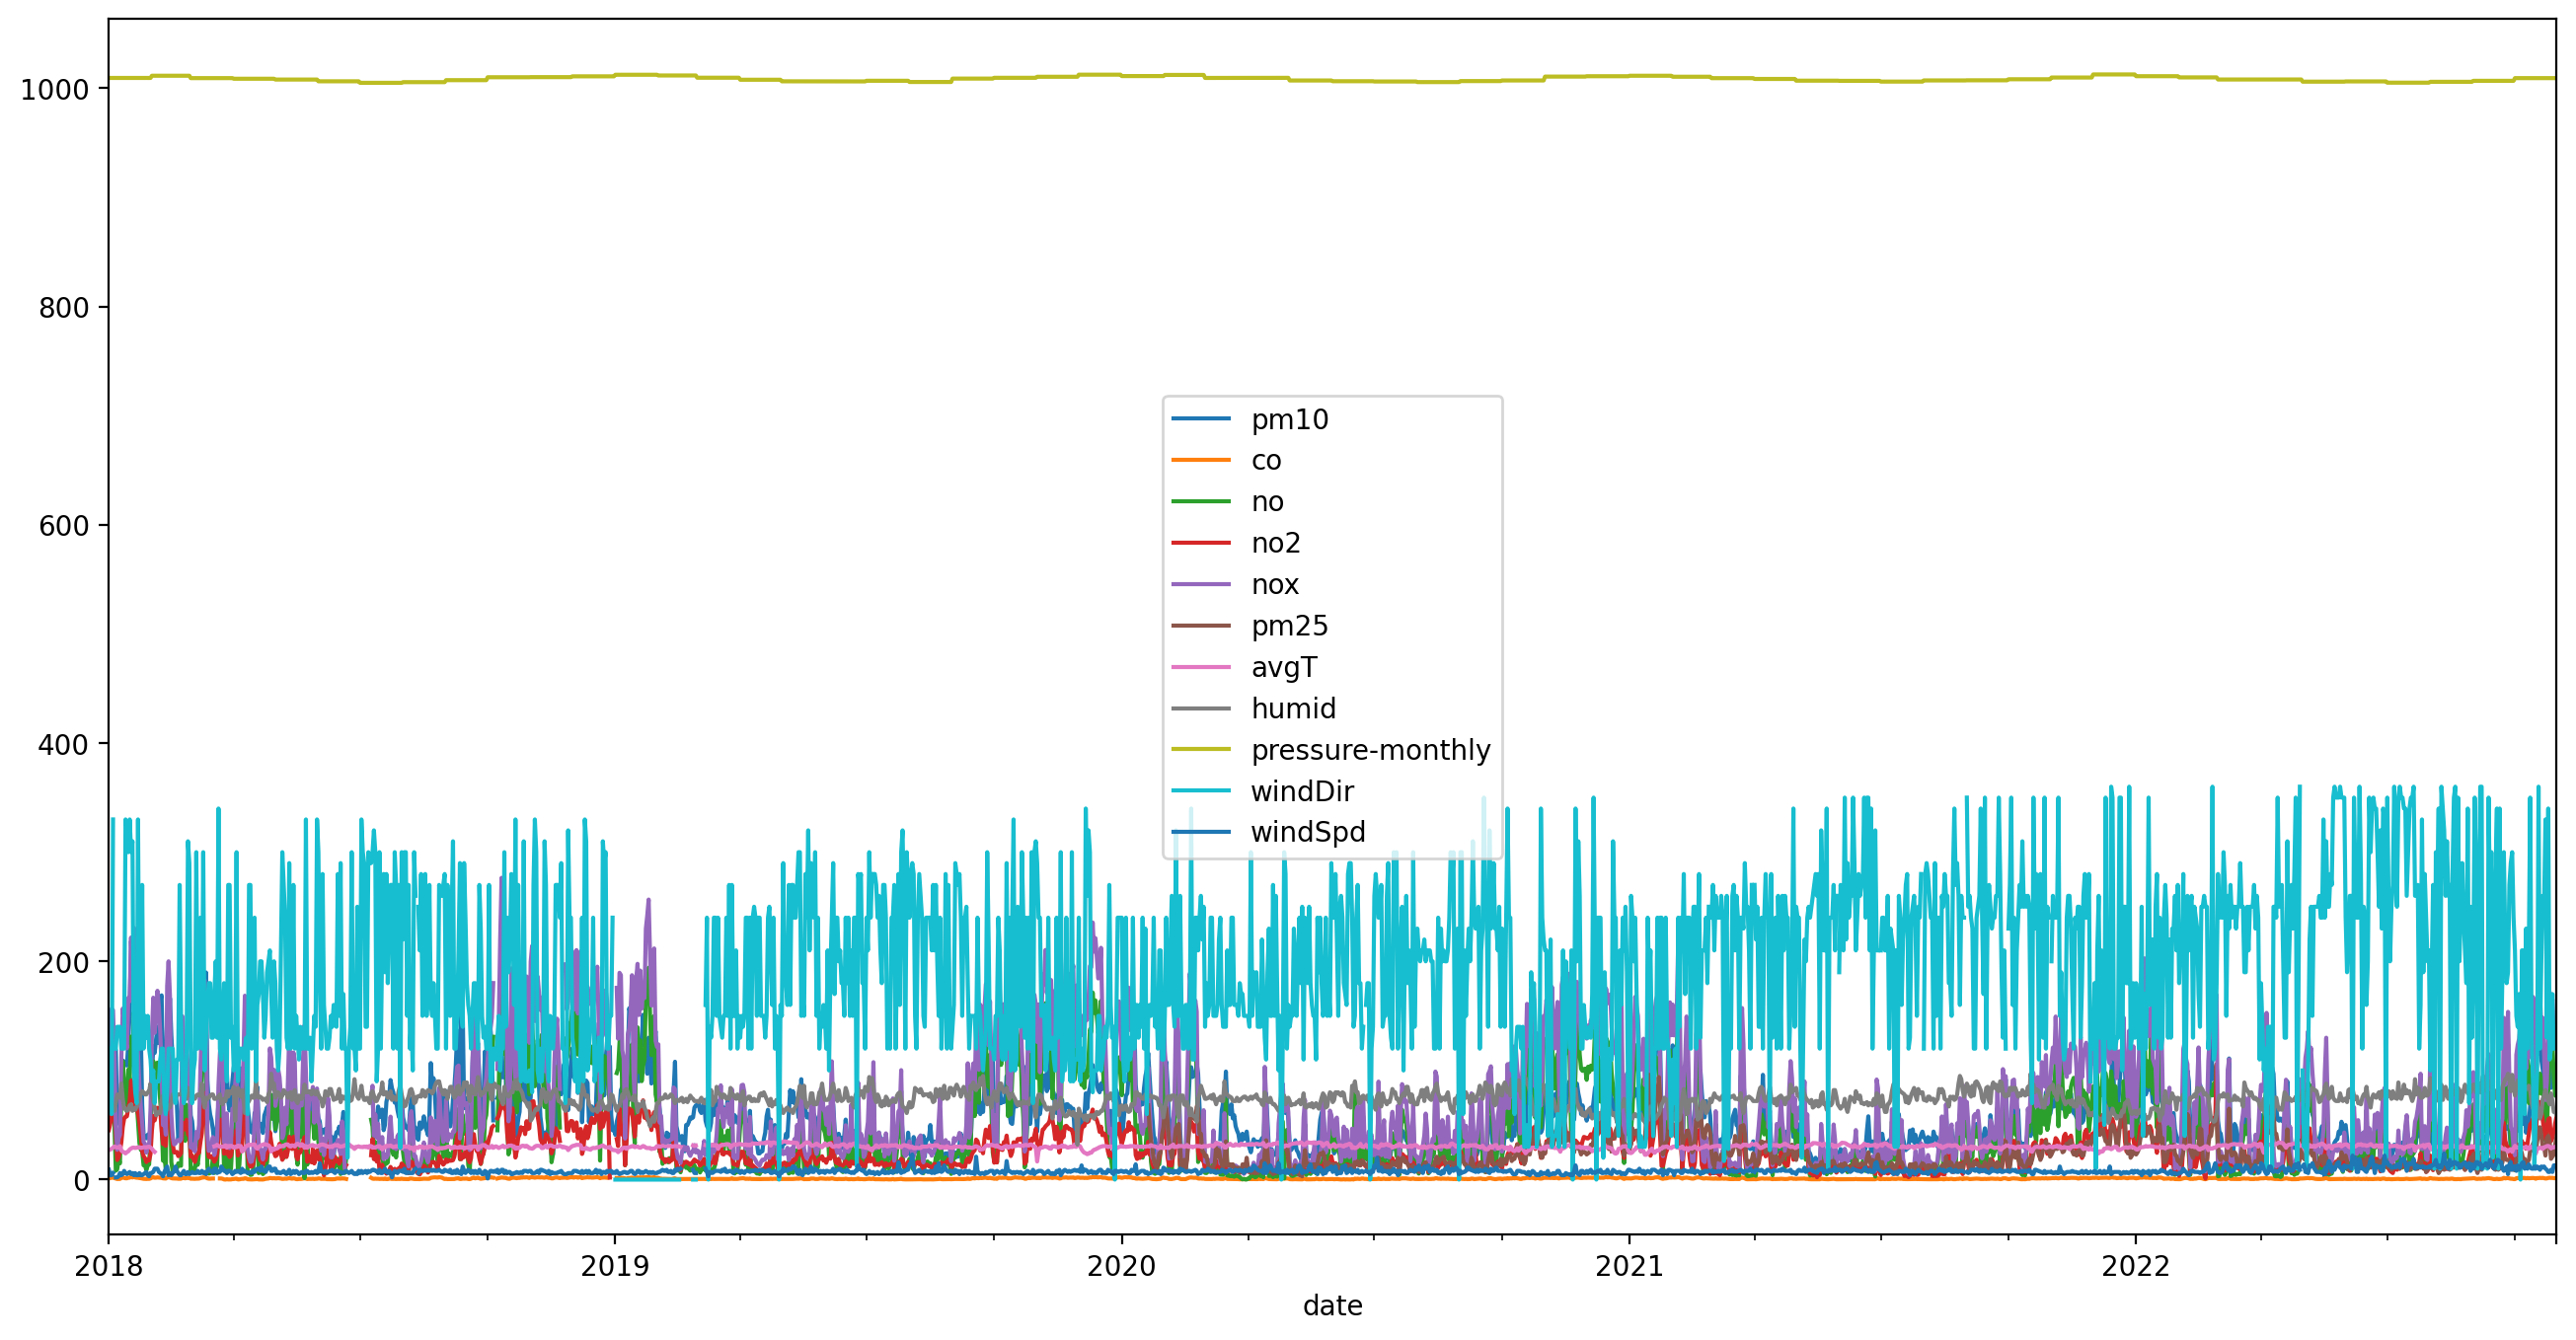

In [5]:
df.set_index('date').plot(figsize=(16, 8));

In [6]:
data = df.sort_values('date').reset_index(drop=True).copy()
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd
0,2018-01-01,65.291667,1.33,74.2,45.4,119.5,NaN,27.1,70,1009.40,100.0,9.0
1,2018-01-02,77.041667,1.35,73.0,51.3,124.2,NaN,27.5,67,1009.40,120.0,4.0
2,2018-01-03,96.708333,1.73,98.5,58.0,156.5,NaN,28.2,66,1009.40,60.0,4.0
3,2018-01-04,115.125000,1.76,92.4,62.7,155.2,NaN,29.3,64,1009.40,330.0,6.0
4,2018-01-05,116.625000,1.35,51.1,60.9,111.9,NaN,30.4,63,1009.40,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,84.000000,1.50,117.6,35.2,152.9,19.0,28.5,79,1009.24,120.0,9.0
1761,2022-10-28,92.000000,1.60,127.1,38.1,165.2,21.0,29.6,72,1009.24,170.0,7.0
1762,2022-10-29,90.000000,1.30,92.0,43.1,135.1,23.0,29.5,62,1009.24,120.0,13.0
1763,2022-10-30,95.000000,1.30,76.9,51.5,128.4,32.0,30.0,62,1009.24,120.0,13.0


In [7]:
y_col = 'pm25'

In [8]:
data.dropna(subset=[y_col], inplace=True)
data

,date,pm10,co,no,no2,nox,pm25,avgT,humid,pressure-monthly,windDir,windSpd
742,2020-01-13,70.0,1.04,49.7,24.4,74.1,42.0,30.1,77,1011.12,130.0,6.0
749,2020-01-20,116.0,1.36,68.2,34.7,102.9,68.0,30.6,76,1011.12,150.0,5.0
750,2020-01-21,95.0,1.06,47.3,22.9,70.2,49.0,30.3,77,1011.12,160.0,6.0
751,2020-01-22,74.0,0.74,16.6,26.3,42.8,36.0,31.6,77,1011.12,150.0,6.0
752,2020-01-23,57.0,0.55,6.5,14.1,20.6,29.0,30.8,75,1011.12,160.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1760,2022-10-27,84.0,1.50,117.6,35.2,152.9,19.0,28.5,79,1009.24,120.0,9.0
1761,2022-10-28,92.0,1.60,127.1,38.1,165.2,21.0,29.6,72,1009.24,170.0,7.0
1762,2022-10-29,90.0,1.30,92.0,43.1,135.1,23.0,29.5,62,1009.24,120.0,13.0
1763,2022-10-30,95.0,1.30,76.9,51.5,128.4,32.0,30.0,62,1009.24,120.0,13.0


In [9]:
df = data[['date', y_col]]
df.columns=['ds', 'y']
df

,ds,y
742,2020-01-13,42.0
749,2020-01-20,68.0
750,2020-01-21,49.0
751,2020-01-22,36.0
752,2020-01-23,29.0
...,...,...
1760,2022-10-27,19.0
1761,2022-10-28,21.0
1762,2022-10-29,23.0
1763,2022-10-30,32.0


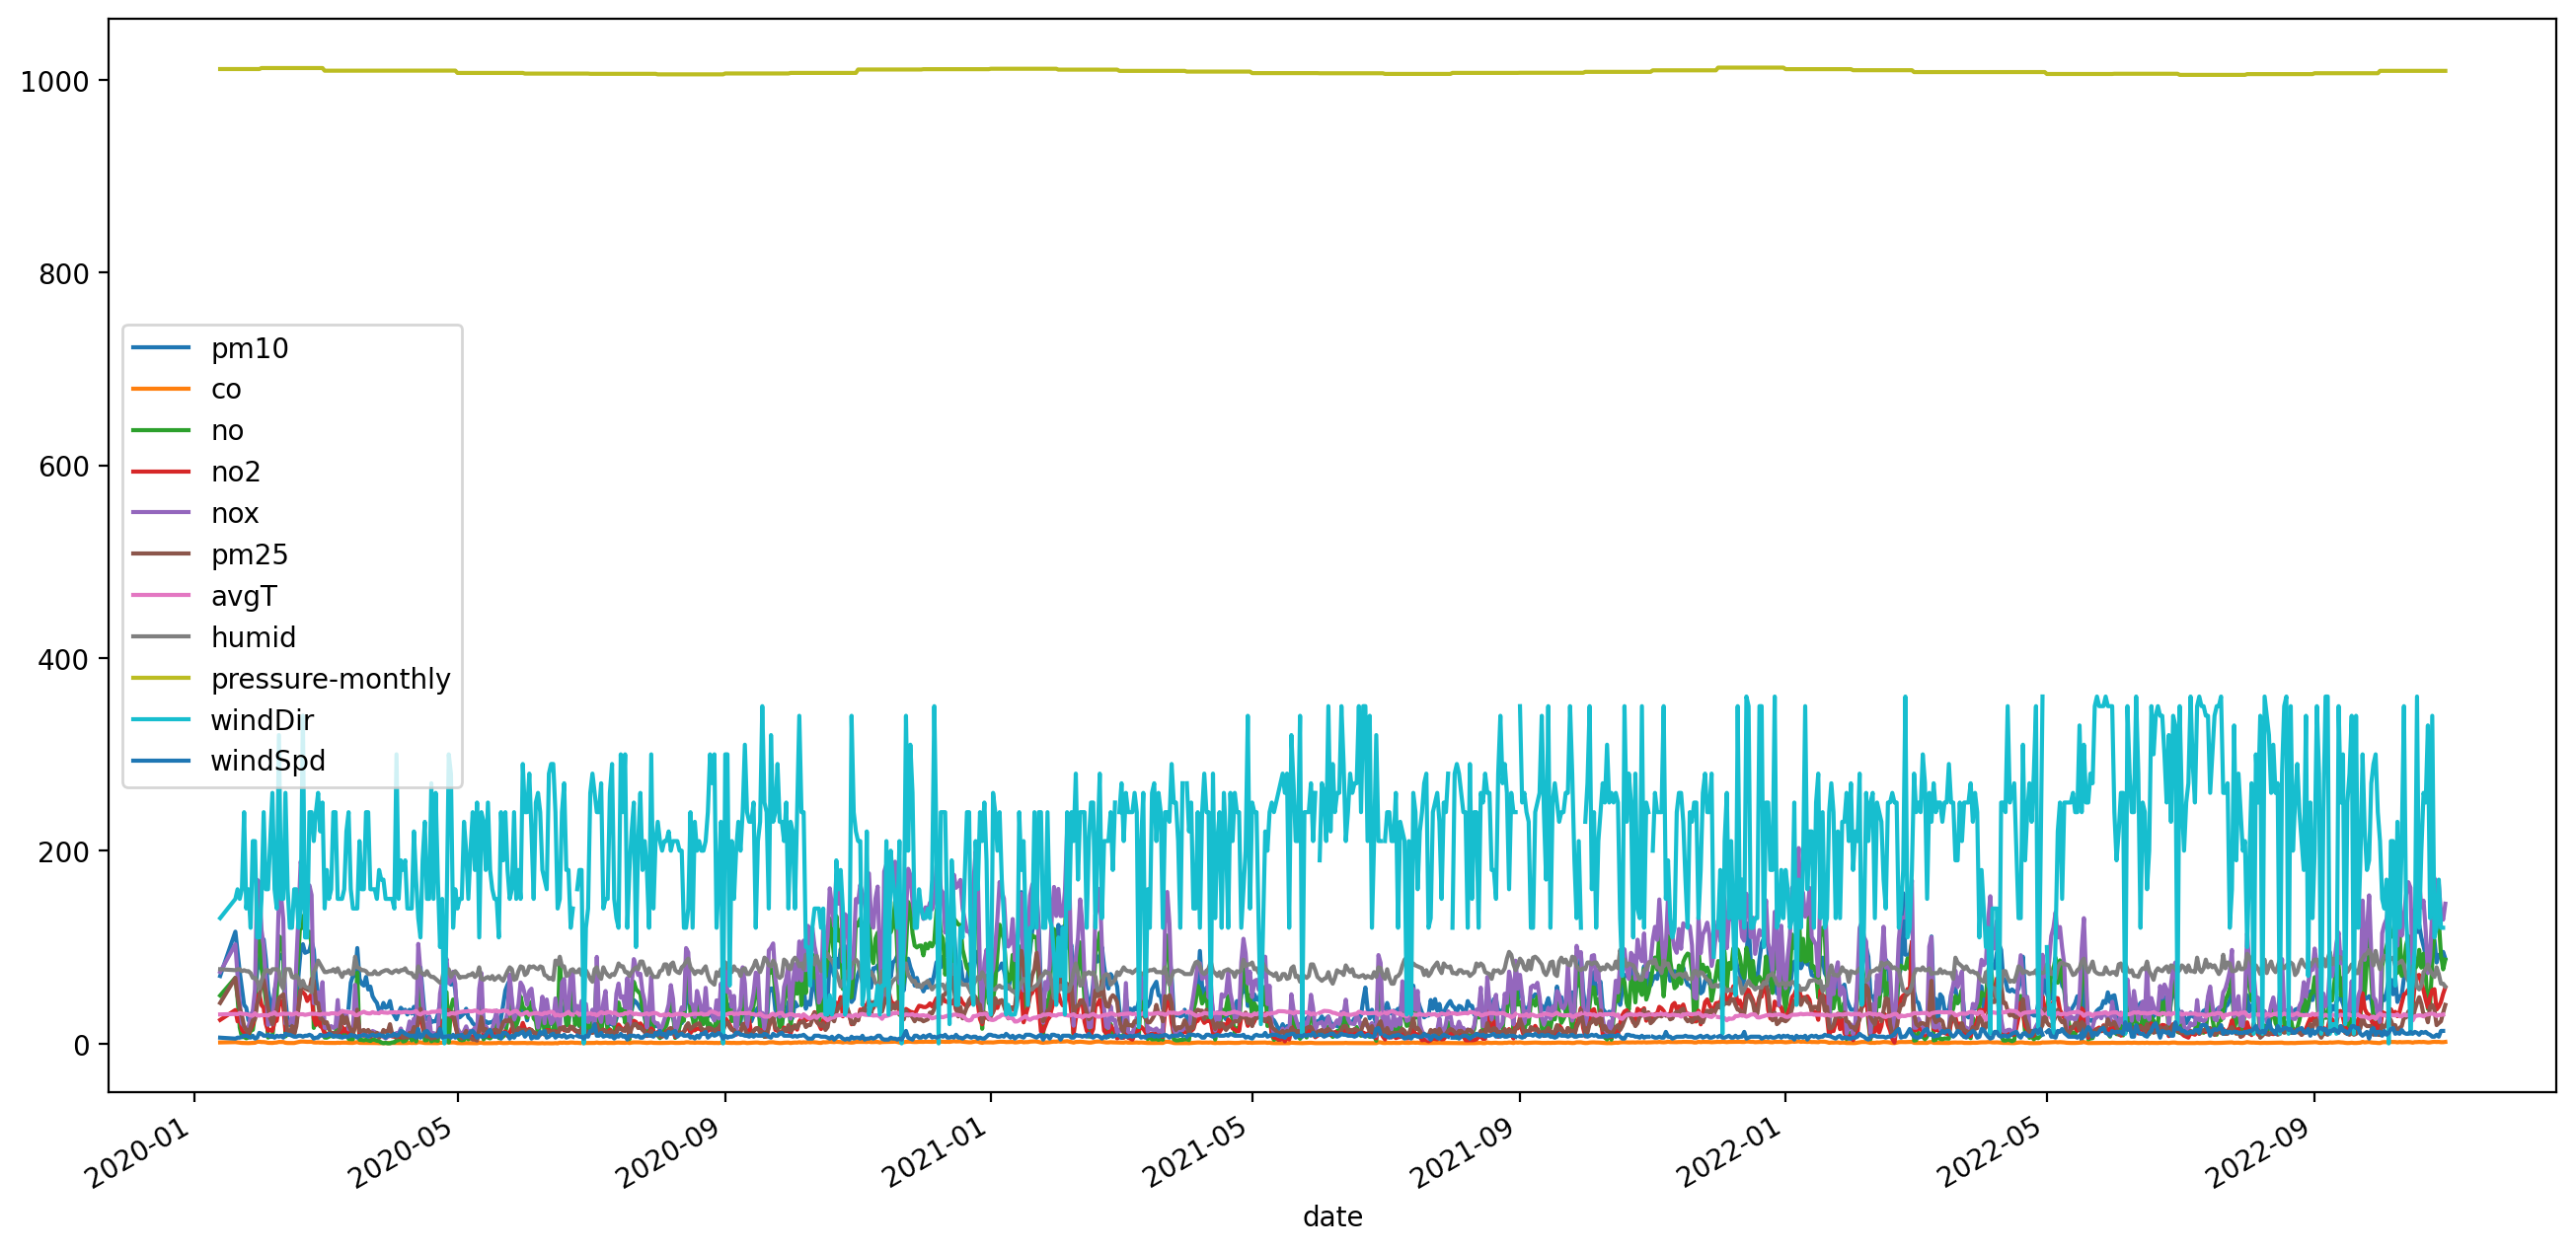

In [10]:
data.set_index('date').plot(figsize=(16, 8));

In [11]:
model=Prophet()

In [12]:
model.__dict__

{'growth': 'linear',
 'changepoints': None,
 'n_changepoints': 25,
 'specified_changepoints': False,
 'changepoint_range': 0.8,
 'yearly_seasonality': 'auto',
 'weekly_seasonality': 'auto',
 'daily_seasonality': 'auto',
 'holidays': None,
 'seasonality_mode': 'additive',
 'seasonality_prior_scale': 10.0,
 'changepoint_prior_scale': 0.05,
 'holidays_prior_scale': 10.0,
 'mcmc_samples': 0,
 'interval_width': 0.8,
 'uncertainty_samples': 1000,
 'start': None,
 'y_scale': None,
 'logistic_floor': False,
 't_scale': None,
 'changepoints_t': None,
 'seasonalities': OrderedDict(),
 'extra_regressors': OrderedDict(),
 'country_holidays': None,
 'stan_fit': None,
 'params': {},
 'history': None,
 'history_dates': None,
 'train_component_cols': None,
 'component_modes': None,
 'train_holiday_names': None,
 'fit_kwargs': {},
 'stan_backend': <prophet.models.CmdStanPyBackend at 0x7f81a0bf4430>}

In [13]:
model.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnjfm0mwp/3p8gxdiv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpnjfm0mwp/4jw6daaj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.9/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45417', 'data', 'file=/tmp/tmpnjfm0mwp/3p8gxdiv.json', 'init=/tmp/tmpnjfm0mwp/4jw6daaj.json', 'output', 'file=/tmp/tmpnjfm0mwp/prophet_modelcdx40w27/prophet_model-20230405102927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:29:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:29:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
df.tail()

,ds,y
1760,2022-10-27,19.0
1761,2022-10-28,21.0
1762,2022-10-29,23.0
1763,2022-10-30,32.0
1764,2022-10-31,40.0


In [15]:
future = model.make_future_dataframe(periods=180, freq='D')
future.tail()

,ds
1191,2023-04-25
1192,2023-04-26
1193,2023-04-27
1194,2023-04-28
1195,2023-04-29


In [16]:
future.head()

,ds
0,2020-01-13
1,2020-01-20
2,2020-01-21
3,2020-01-22
4,2020-01-23


In [17]:
forecast = model.predict(future)

In [18]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-13,18.497280,24.976793,49.418913,18.497280,18.497280,18.357289,18.357289,18.357289,0.326116,0.326116,0.326116,18.031173,18.031173,18.031173,0.0,0.0,0.0,36.854569
1,2020-01-20,18.670494,26.714429,51.898918,18.670494,18.670494,20.319349,20.319349,20.319349,0.326116,0.326116,0.326116,19.993233,19.993233,19.993233,0.0,0.0,0.0,38.989843
2,2020-01-21,18.695238,27.000221,51.482307,18.695238,18.695238,20.825651,20.825651,20.825651,0.888591,0.888591,0.888591,19.937060,19.937060,19.937060,0.0,0.0,0.0,39.520890
3,2020-01-22,18.719983,27.852686,51.765718,18.719983,18.719983,20.798365,20.798365,20.798365,1.004731,1.004731,1.004731,19.793634,19.793634,19.793634,0.0,0.0,0.0,39.518348
4,2020-01-23,18.744728,26.492957,49.753630,18.744728,18.744728,19.681417,19.681417,19.681417,0.113676,0.113676,0.113676,19.567741,19.567741,19.567741,0.0,0.0,0.0,38.426145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1191,2023-04-25,26.749300,13.290610,36.731260,25.943135,27.637070,-2.124572,-2.124572,-2.124572,0.888591,0.888591,0.888591,-3.013163,-3.013163,-3.013163,0.0,0.0,0.0,24.624728
1192,2023-04-26,26.757947,12.715632,36.466810,25.944719,27.651437,-2.279654,-2.279654,-2.279654,1.004731,1.004731,1.004731,-3.284385,-3.284385,-3.284385,0.0,0.0,0.0,24.478293
1193,2023-04-27,26.766594,11.678644,35.406490,25.944623,27.665574,-3.416246,-3.416246,-3.416246,0.113676,0.113676,0.113676,-3.529922,-3.529922,-3.529922,0.0,0.0,0.0,23.350348
1194,2023-04-28,26.775241,11.247846,35.100845,25.941106,27.678831,-3.914682,-3.914682,-3.914682,-0.163928,-0.163928,-0.163928,-3.750754,-3.750754,-3.750754,0.0,0.0,0.0,22.860559


In [19]:
df

,ds,y
742,2020-01-13,42.0
749,2020-01-20,68.0
750,2020-01-21,49.0
751,2020-01-22,36.0
752,2020-01-23,29.0
...,...,...
1760,2022-10-27,19.0
1761,2022-10-28,21.0
1762,2022-10-29,23.0
1763,2022-10-30,32.0


In [20]:
dfcst=forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
dfcst

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-13,36.854569,24.976793,49.418913
1,2020-01-20,38.989843,26.714429,51.898918
2,2020-01-21,39.520890,27.000221,51.482307
3,2020-01-22,39.518348,27.852686,51.765718
4,2020-01-23,38.426145,26.492957,49.753630
...,...,...,...,...
1191,2023-04-25,24.624728,13.290610,36.731260
1192,2023-04-26,24.478293,12.715632,36.466810
1193,2023-04-27,23.350348,11.678644,35.406490
1194,2023-04-28,22.860559,11.247846,35.100845


In [21]:
dt=pd.merge(df, dfcst, left_on='ds', right_on='ds')
dt

,ds,y,yhat,yhat_lower,yhat_upper
0,2020-01-13,42.0,36.854569,24.976793,49.418913
1,2020-01-20,68.0,38.989843,26.714429,51.898918
2,2020-01-21,49.0,39.520890,27.000221,51.482307
3,2020-01-22,36.0,39.518348,27.852686,51.765718
4,2020-01-23,29.0,38.426145,26.492957,49.753630
...,...,...,...,...,...
1011,2022-10-27,19.0,31.697743,20.192921,43.663414
1012,2022-10-28,21.0,31.980425,19.489708,44.846050
1013,2022-10-29,23.0,32.017265,19.609494,44.036326
1014,2022-10-30,32.0,31.538161,19.977871,43.865171


In [22]:
dt.shape

(1016, 5)

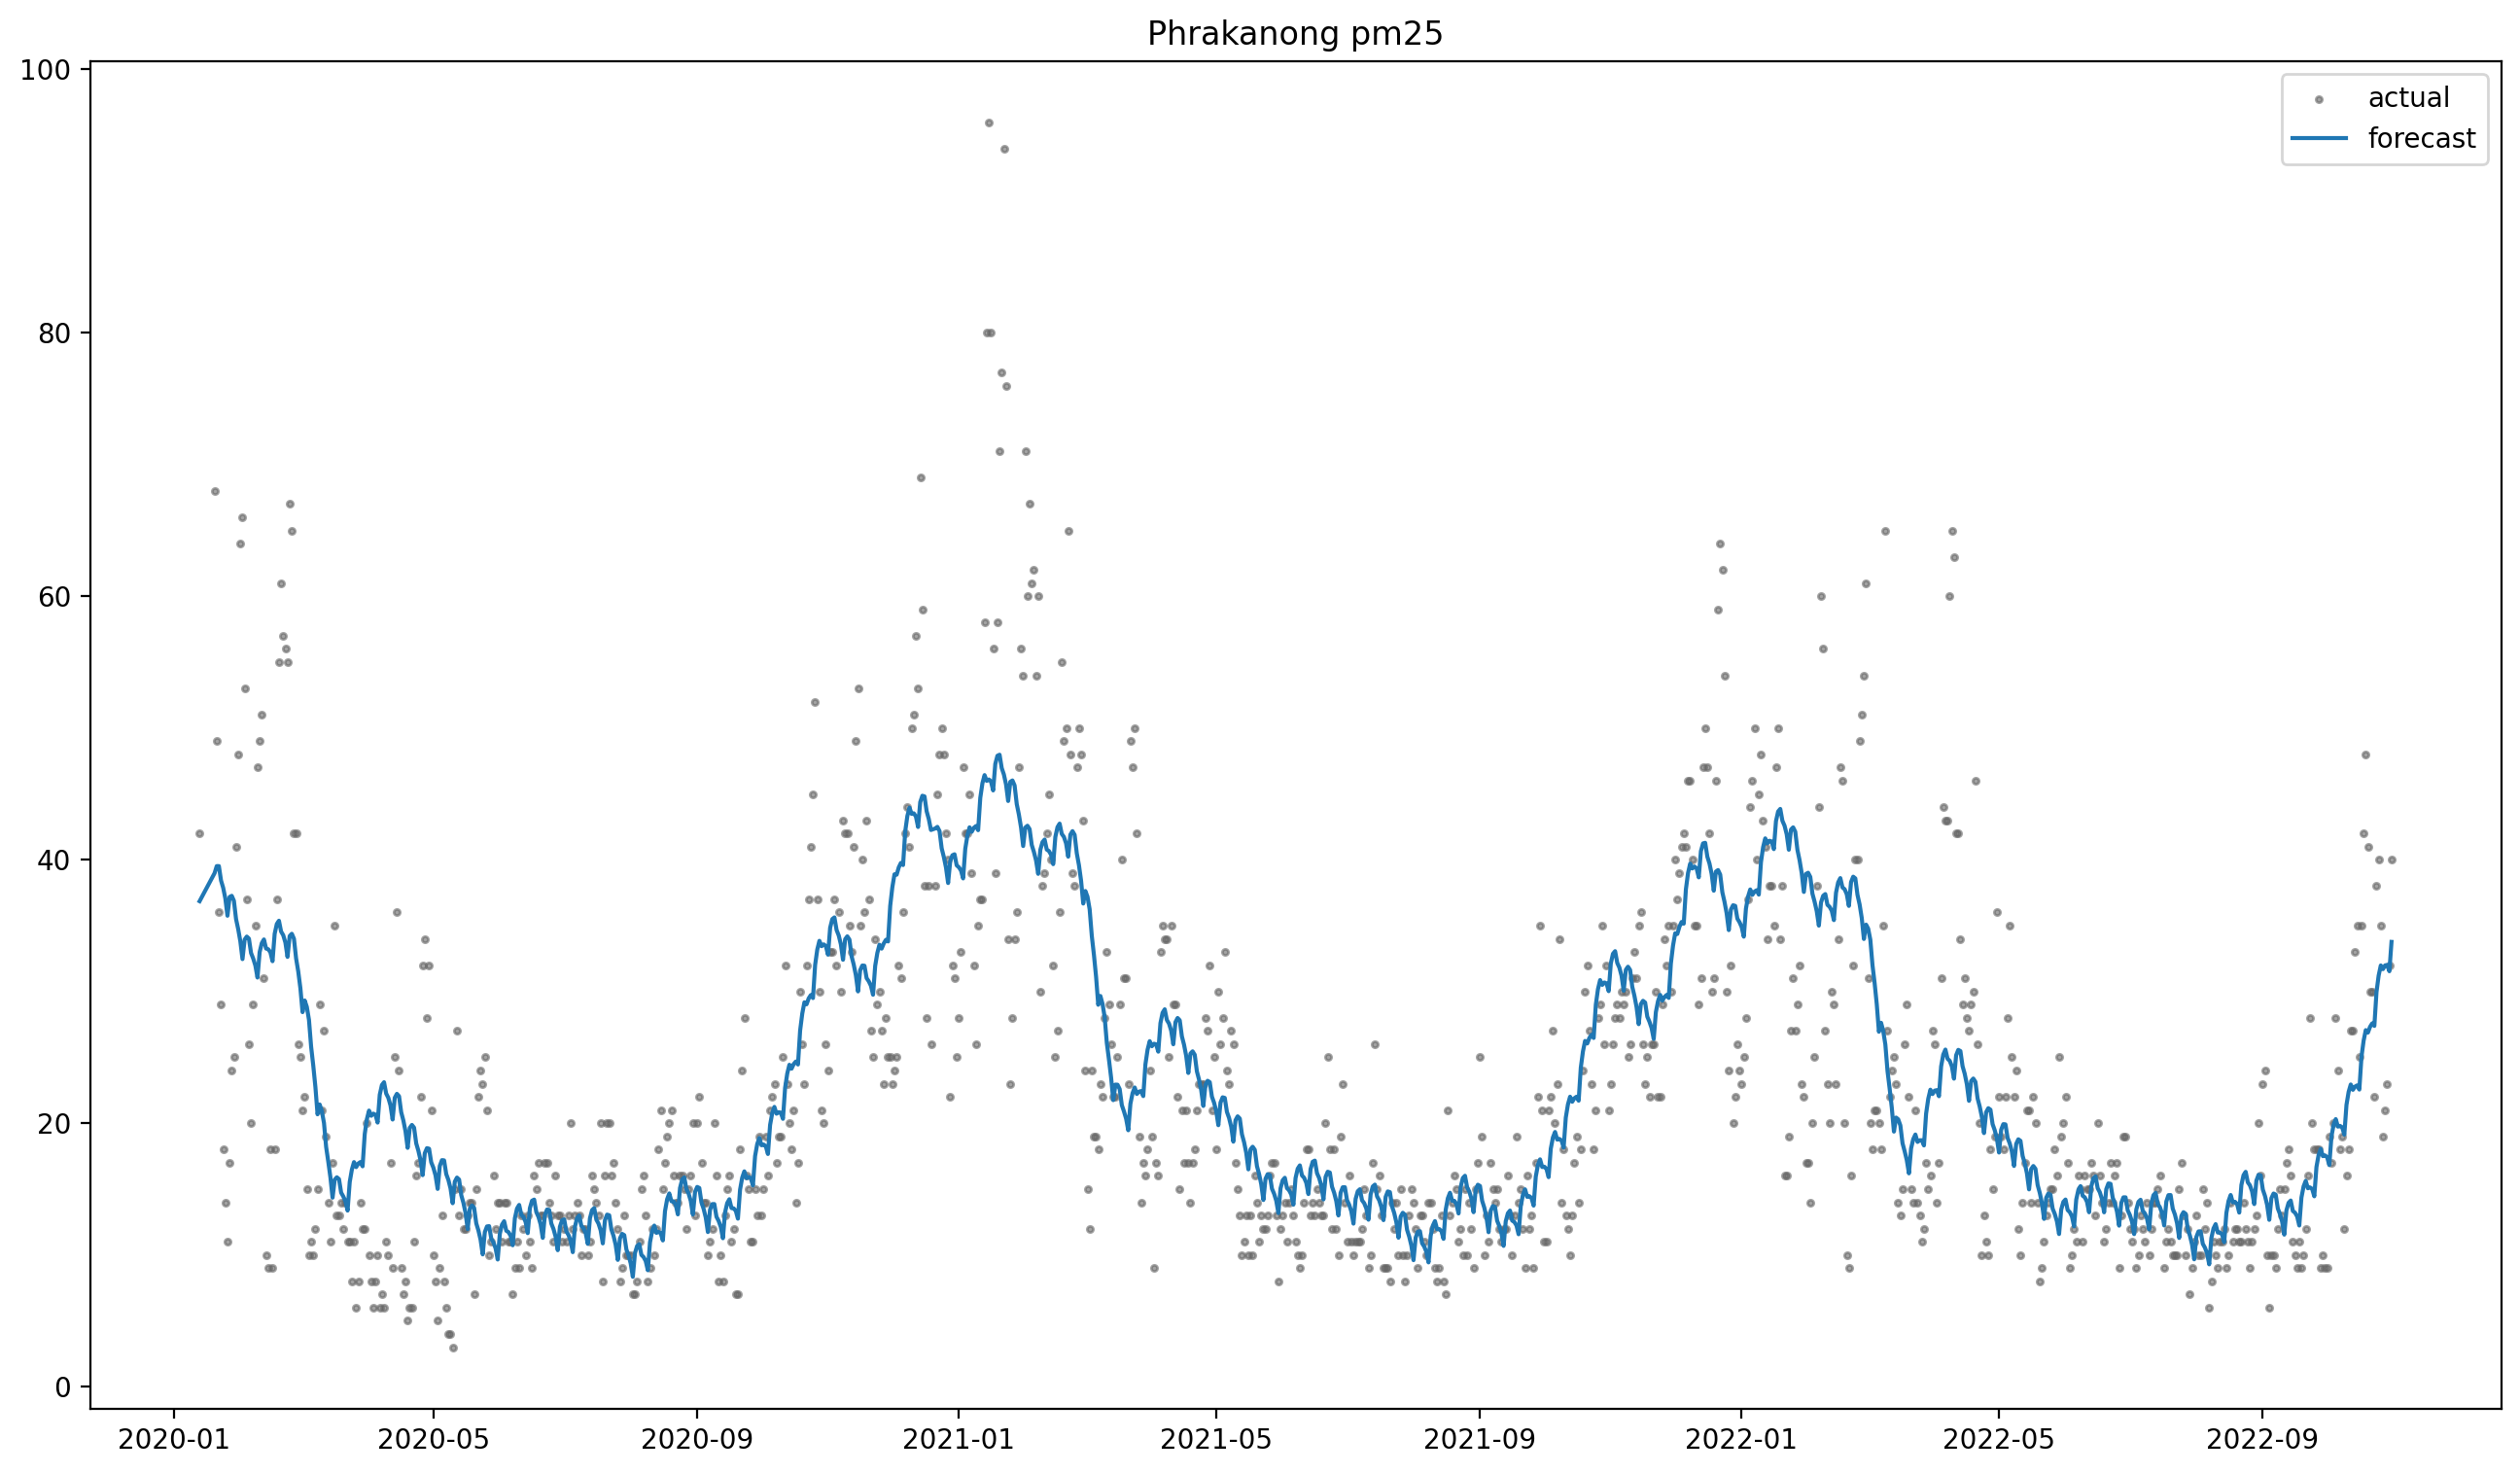

In [23]:
plt.figure(figsize=(16,9))
plt.scatter(dt['ds'], dt['y'], color='.4', label='actual', s=5, alpha=.6)
plt.plot(dt['ds'], dt['yhat'], label='forecast')
plt.title(f'Phrakanong {y_col}')
plt.legend();

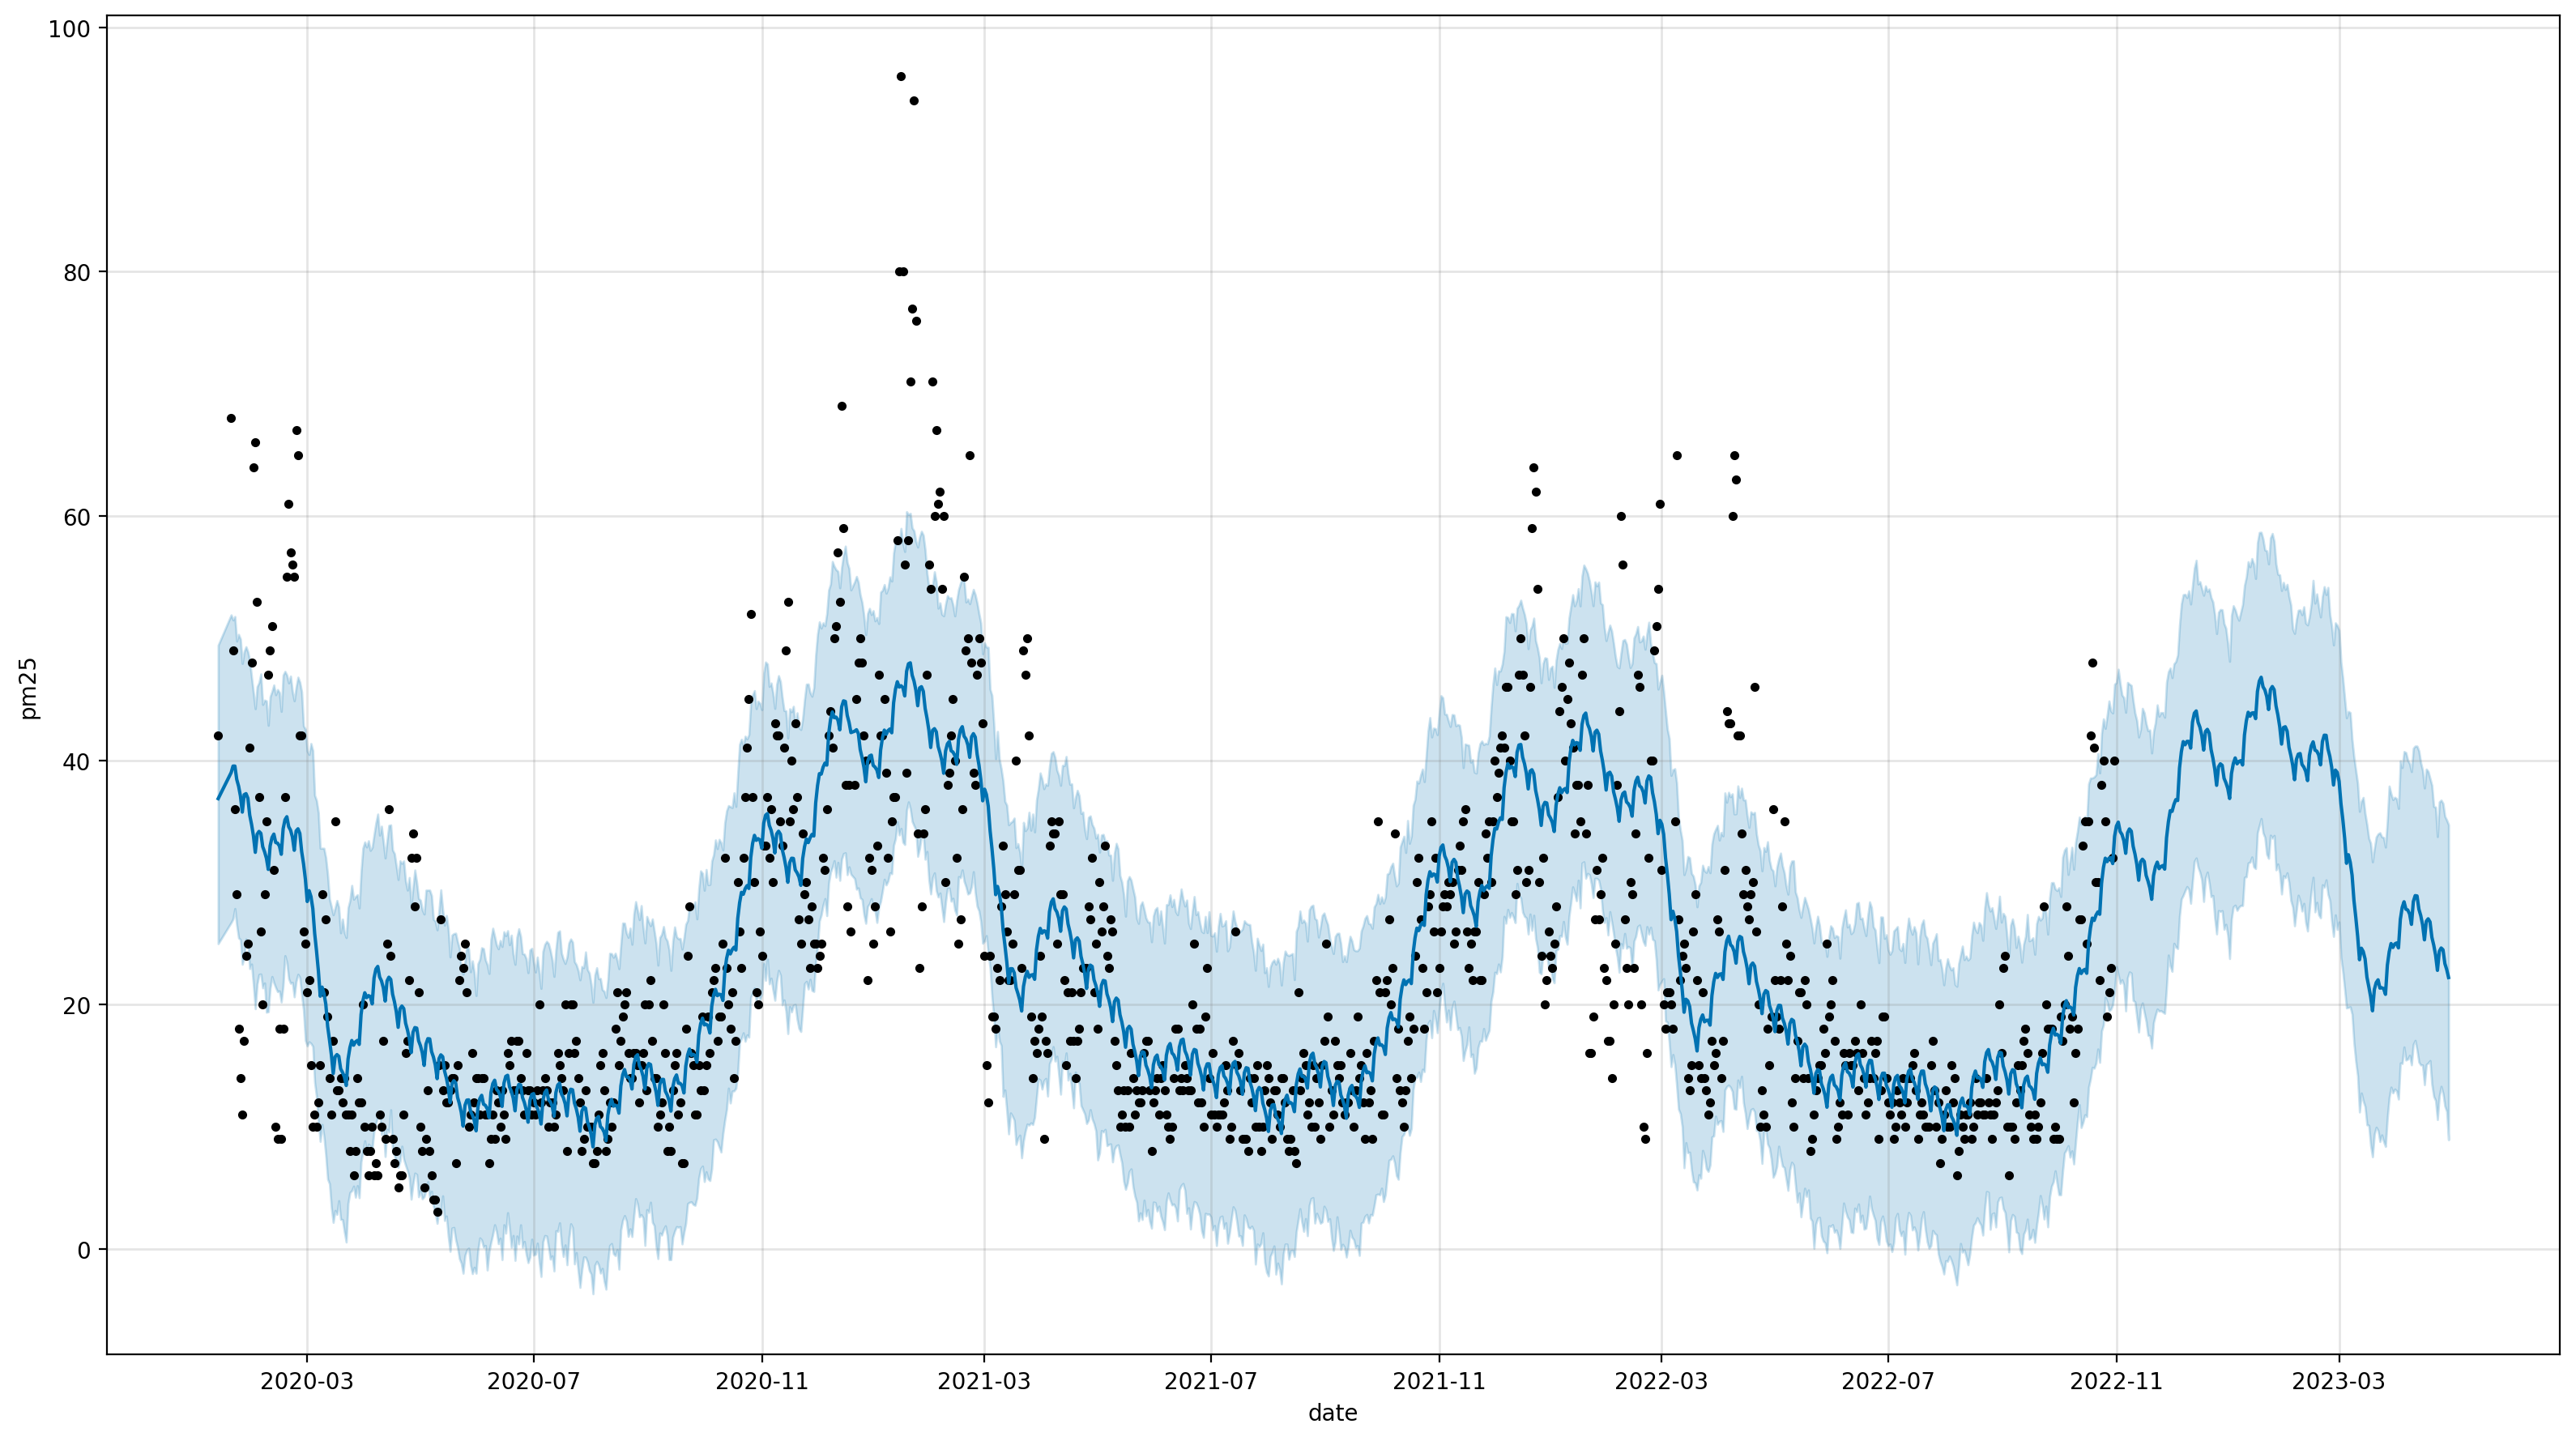

In [24]:
fig=model.plot(forecast, uncertainty=True, figsize=(16, 9), xlabel='date', ylabel=y_col)

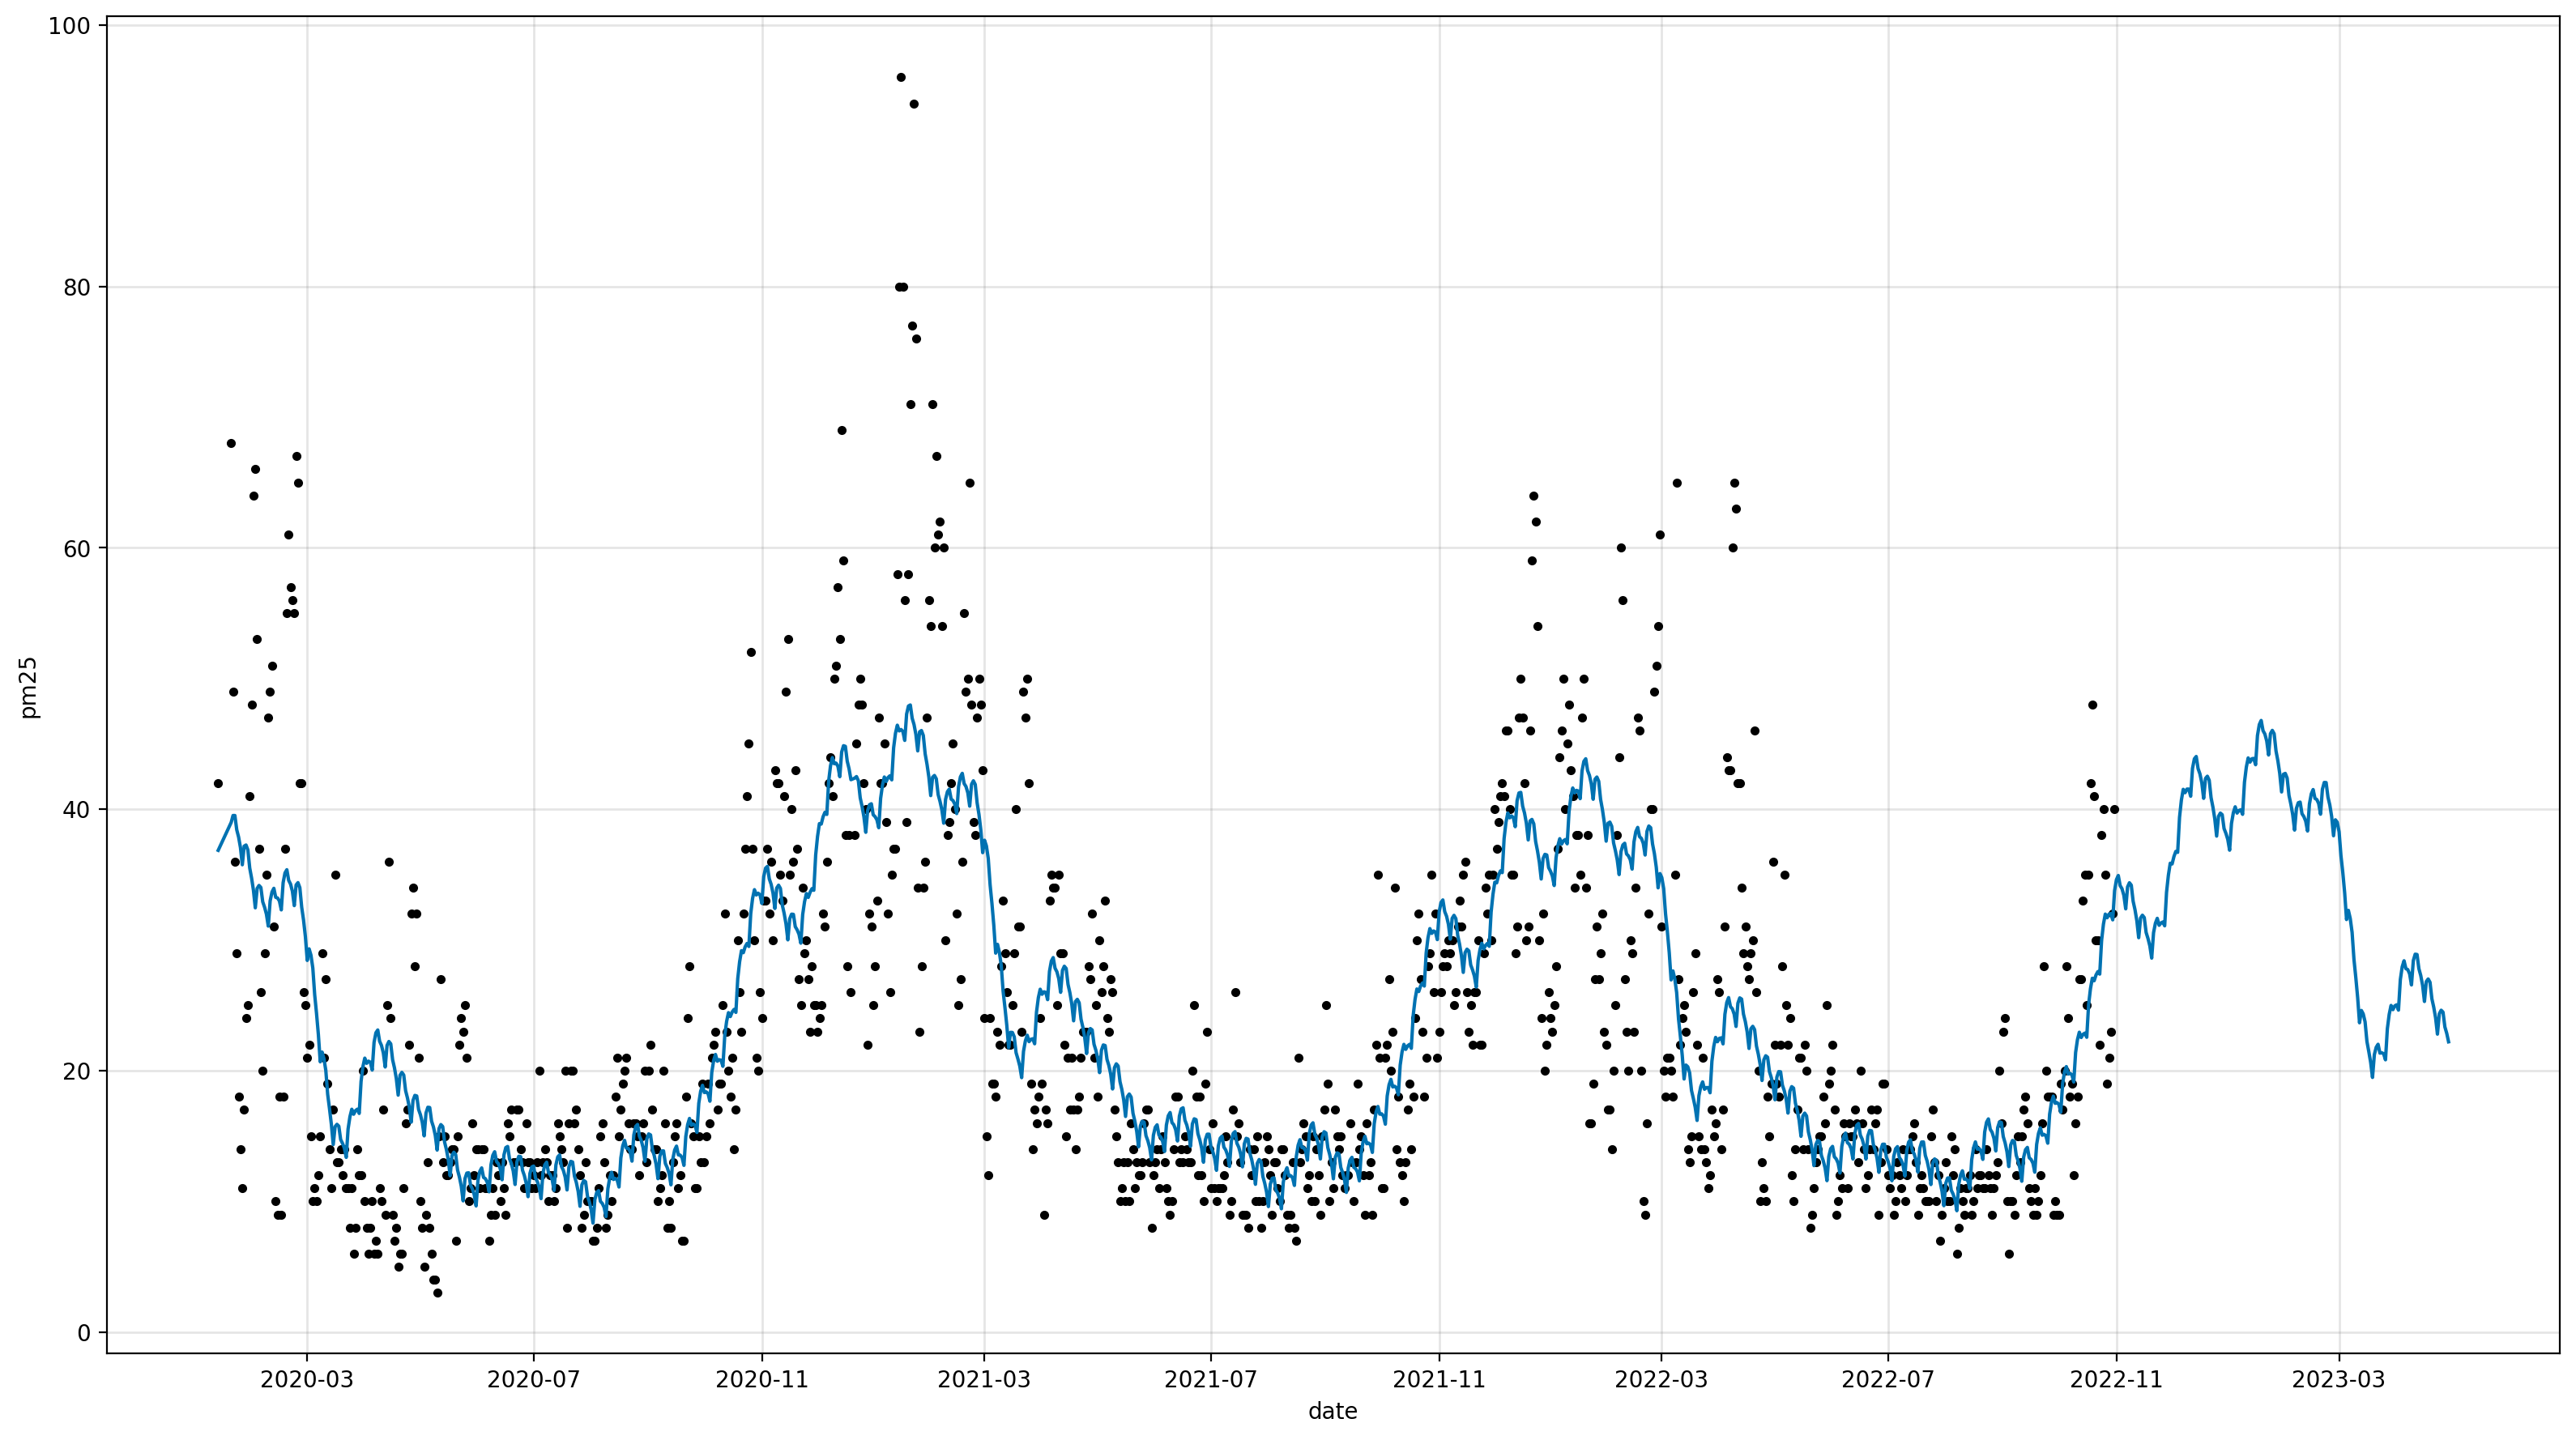

In [25]:
fig=model.plot(forecast, uncertainty=False, figsize=(16, 9), xlabel='date', ylabel=y_col)

In [26]:
dfcstnew = forecast.tail(180)

In [27]:
dfcstt = dfcstnew[['ds', 'yhat']]
ypred = dfcstt.rename(columns={1:'yhat'})
ypred

,ds,yhat
1016,2022-11-01,34.611701
1017,2022-11-02,34.929523
1018,2022-11-03,34.157530
1019,2022-11-04,33.916845
1020,2022-11-05,33.409960
...,...,...
1191,2023-04-25,24.624728
1192,2023-04-26,24.478293
1193,2023-04-27,23.350348
1194,2023-04-28,22.860559


In [28]:
dfcstt = dfcstnew[['ds', 'yhat']]
ypred = dfcstt.rename(columns={1:'yhat'}).round(0).head(7)
ypred

,ds,yhat
1016,2022-11-01,35.0
1017,2022-11-02,35.0
1018,2022-11-03,34.0
1019,2022-11-04,34.0
1020,2022-11-05,33.0
1021,2022-11-06,32.0
1022,2022-11-07,34.0


In [29]:
ypred.mean().round(0)

<ipython-input-29-2ab64095c772>:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  ypred.mean().round(0)


yhat    34.0
dtype: float64

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
 
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [31]:
metric_df = forecast.set_index('ds')[['yhat']].join(df.set_index('ds').y).reset_index()
metric_df.dropna(inplace=True)

In [32]:
r2_score(metric_df.y, metric_df.yhat) #score

0.5581633408989439

In [33]:
mse = mean_squared_error(metric_df.y, metric_df.yhat) #mse
mse

89.4409952956145

In [34]:
import math
#mse = np.square(np.subtract(metric_df.y,metric_df.yhat)).mean() 
mse = mean_squared_error(metric_df.y, metric_df.yhat)
ans = math.sqrt(mse) 
ans

9.457324954532043